In [1]:
# if all else fails, be sure to download the exact package versions in R if trying to debug the pipeline brings no fruit.
# there is a known issue with tidyr, which is why you should NOT use the latest version, at least at the time when this 
# comment was written. Download version 0.8.2"

#require(devtools)
#install_version("tidyr", version = "0.8.2", repos = "http://cran.us.r-project.org")

# The other package versions that this code was tested with were as follows:
tissue=data.frame(read.csv("this_tissue.txt",header=F))$V1 #this dir's tissue
tissue = as.character(tissue)

library(ExOutBench)
library(tidyr)
library(radiant.data)
library(textshape)
library(ExOutBench)
library(dplyr)
library(magrittr)
library(FSA)
library(ggplot2)
library(readr)
library(stringr)
library(jupyterslack)


Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on 'this_tissue.txt'”
Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: ggplot2

Loading required package: lubridate


Attaching package: ‘lubridate’


The following object is masked from ‘package:base’:

    date


Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘radiant.data’


The following objects are masked from ‘package:lubridate’:

    month, wday


The following object is masked from ‘package:ggplot2’:

    diamonds



Attaching package: ‘te


R version 3.5.2 (2018-12-20)
Platform: x86_64-redhat-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /usr/lib64/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.utf8       LC_NUMERIC=C             
 [3] LC_TIME=en_US.utf8        LC_COLLATE=en_US.utf8    
 [5] LC_MONETARY=en_US.utf8    LC_MESSAGES=en_US.utf8   
 [7] LC_PAPER=en_US.utf8       LC_NAME=C                
 [9] LC_ADDRESS=C              LC_TELEPHONE=C           
[11] LC_MEASUREMENT=en_US.utf8 LC_IDENTIFICATION=C      

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] stringr_1.4.0      readr_1.3.1        FSA_0.8.25         textshape_1.6.0   
 [5] radiant.data_1.0.6 dplyr_0.8.3        lubridate_1.7.4    ggplot2_3.2.1     
 [9] magrittr_1.5       tidyr_0.8.2        ExOutBench_0.1.0  

loaded via a namespace (and not attached):
 [1] httr_1.4.1        shinyFiles_0.7.3  jsonlite_1.6      viridisLite_0.3.0
 [5] carData_3.0-2     modelr_0.1.5      shiny_1.4.0       assertthat_0.2.1 
 [9] cellranger_1.1.0  pillar_1.4.2      backports_1.1.5   lattice_0.20-38  
[13] glue_1.3.1        uuid_0.1-2        digest_0.6.22     promises_1.1.0   
[17] rvest_0.3.4       colorspace_1.4-1  plyr_1.8.4        htmltools_0.4.0  
[21] httpuv_1.5.2      psych_1.8.12      pkgconfig_2.0.3   broom_0.5.2      
[25] haven_2.1.1       purrr_0.3.3       xtable_1.8-4      scales_1.0.0     
[29] openxlsx_4.1.0.1  later_1.0.0       rio_0.5.16        tibble_2.1.3     
[33] generics_0.0.2    car_3.0-3         withr_2.1.2       repr_1.0.1       
[37] tidyverse_1.2.1   lazyeval_0.2.2    mnormt_1.5-5      crayon_1.3.4     
[41] readxl_1.3.1      mime_0.7          evaluate_0.14     fs_1.3.1         
[45] nlme_3.1-137      forcats_0.4.0     xml2_1.2.2        foreign_0.8-71   
[49] tools_3.5.2       data.table_1.12.6 hms_0.5.1         plotly_4.9.0     
[53] munsell_0.5.0     writexl_1.1       zip_2.0.4         shinyAce_0.4.1   
[57] compiler_3.5.2    rlang_0.4.1       grid_3.5.2        rstudioapi_0.10  
[61] pbdZMQ_0.3-3      IRkernel_1.0.1    htmlwidgets_1.5.1 rmarkdown_1.16   
[65] base64enc_0.1-3   gtable_0.3.0      abind_1.4-5       curl_4.2         
[69] markdown_1.1      R6_2.4.0          gridExtra_2.3     knitr_1.25       
[73] fastmap_1.0.1     zeallot_0.1.0     stringi_1.4.3     parallel_3.5.2   
[77] IRdisplay_0.7.0   Rcpp_1.0.2        import_1.1.0      vctrs_0.2.0      
[81] tidyselect_0.2.5  xfun_0.10        

In [2]:

#v8_scores <- read_tsv("/home/bkotis/Documents/Jonah_pipeline/filter_output_gold/combined.fdr.no.global.outliers.ad.scores.in.ADPSBQ.tsv", progress = F)
v8_scores <- read_tsv(paste0("combined_filtered_scores_phaser/combined.fdr.no.global.outliers.ad.scores.in.", tissue,".tsv"), progress = F)

rare.variants <- read_tsv(
  "all_rare_variants_SNPs_10kb_genebody_w_consdetail_no_NA.tsv", 
  progress = F)
notify_self(paste0("*", tissue ," [S03]: ", "Finished reading in rare var and filtered scores matrix", "*"))

ERROR: Error: 'combined_filtered_scores_phaser/combined.fdr.no.global.outliers.ad.scores.in.WHLBLD.tsv' does not exist in current working directory ('/home/ydong/BencePipeline').


In [ ]:
v8_scores %<>% 
  gather(SampleName, outlier.score, -GeneID) %>%
  filter(complete.cases(.)) 

Warning message in if (!(c("SampleName", "GeneID", "chr", "start", "consdetail") %in% :
“the condition has length > 1 and only the first element will be used”

Only considering genes with at least one outlier at 0.05 
Checking to only include individuals that have genotype data!!
Combining outlier calls with rare variant information


Joining, by = c("GeneID", "SampleName")


Calculating enrichment scores

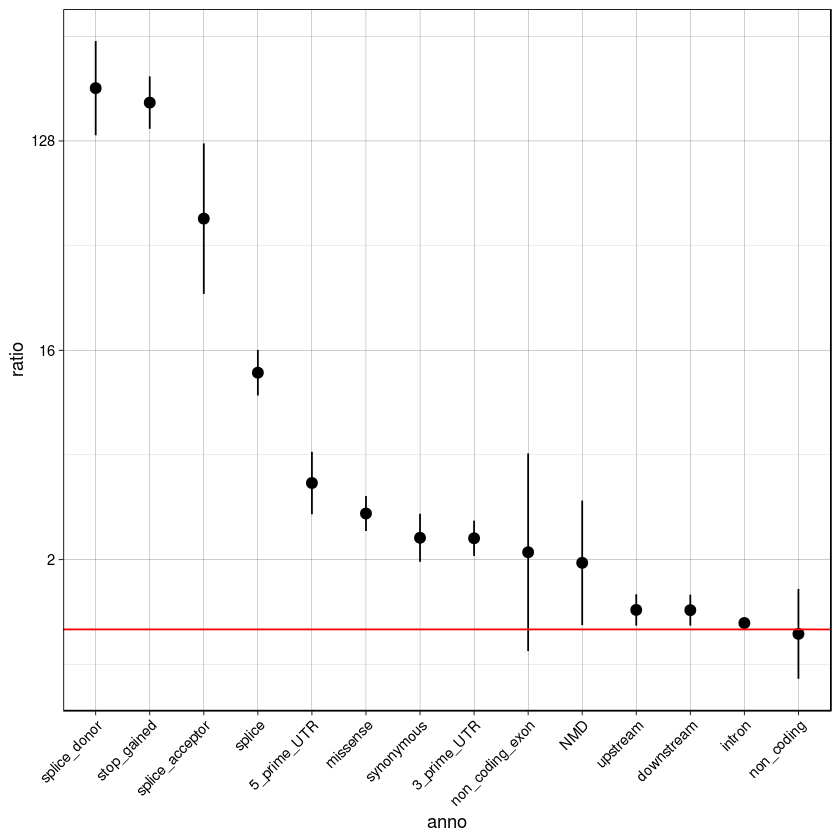

In [12]:

enrichment.by.annotation.output.v8_phaser <- 
  enrichment_by_annotation(
    v8_scores ,
    rare.variants)
notify_self(paste0("*", tissue ," [S03]: ",  "Enrichment by annotation for phaser", "*"), show_plot = 'T')

Only considering genes with at least one outlier at 0.05 
Checking to only include individuals that have genotype data!!


Joining, by = c("GeneID", "SampleName")


Calculating enrichment scores

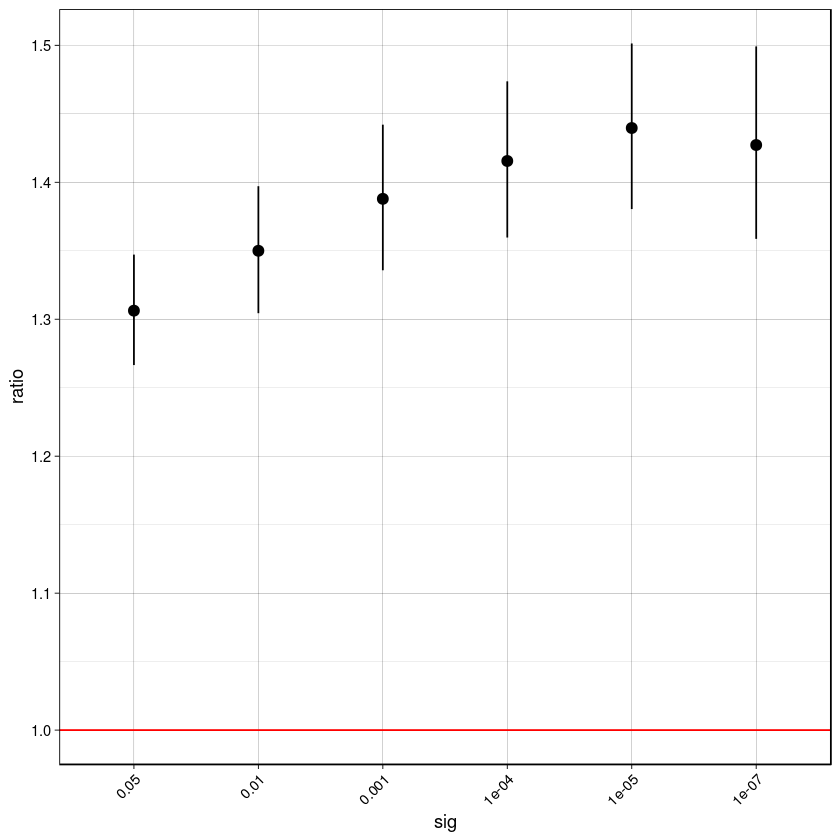

In [13]:
enrichment.by.significance.output.v8_phaser <- 
  enrichment_by_significance(
    v8_scores ,
    rare.variants)
notify_self(paste0("*",tissue ," [S03]: ",  "Enrichment by significance for phaser", "*"), show_plot = 'T')

## Lets see how Jonah's stuff compares to this for the same tissue

In [15]:
v8_scores <- read_tsv(paste0("combined_filtered_scores_Jonah/combined.fdr.no.global.outliers.ad.scores.in." ,tissue, ".tsv"), progress = F)
v8_scores %<>% 
  gather(SampleName, outlier.score, -GeneID) %>%
  filter(complete.cases(.)) 
#rare.variants <- read_tsv(
#  "all_rare_variants_SNPs_10kb_genebody_w_consdetail_no_NA.tsv", 
#  progress = F)
notify_self(paste0("*",tissue ," [S03]: ", "Now reading in var level AE data files","*"))

Parsed with column specification:
cols(
  .default = col_double(),
  GeneID = col_character()
)
See spec(...) for full column specifications.


Warning message in if (!(c("SampleName", "GeneID", "chr", "start", "consdetail") %in% :
“the condition has length > 1 and only the first element will be used”

Only considering genes with at least one outlier at 0.05 
Checking to only include individuals that have genotype data!!
Combining outlier calls with rare variant information


Joining, by = c("GeneID", "SampleName")


Calculating enrichment scores

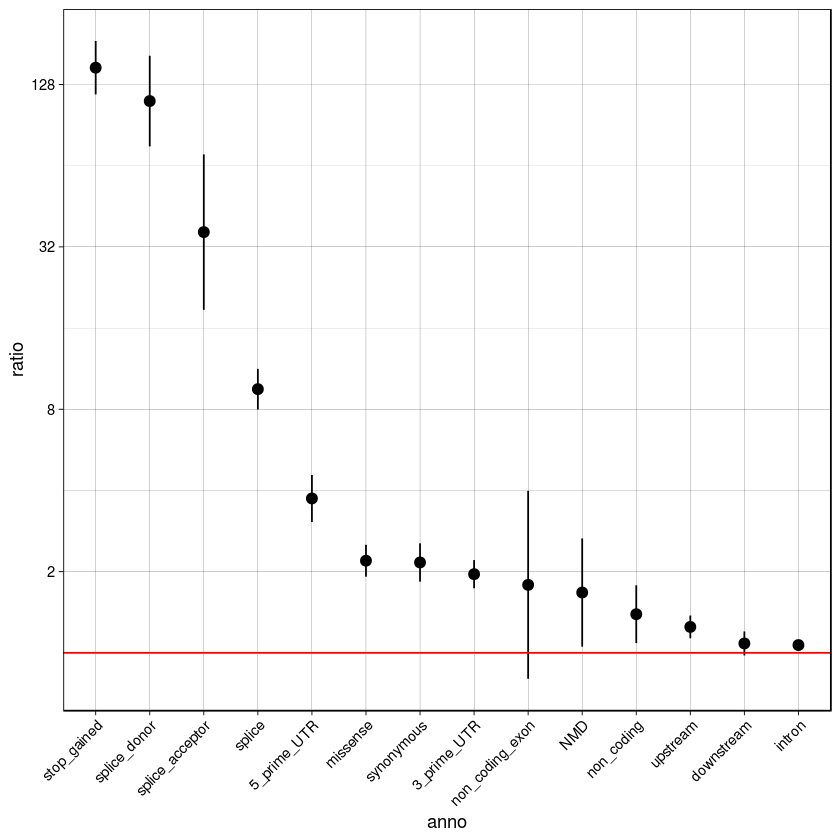

In [16]:
enrichment.by.annotation.output.v8_Jonah <- 
  enrichment_by_annotation(
    v8_scores ,
    rare.variants)
notify_self(paste0("*",tissue ," [S03]: ",  "Enrichment by annotation for var level AE data","*"), show_plot = 'T')

Only considering genes with at least one outlier at 0.05 
Checking to only include individuals that have genotype data!!


Joining, by = c("GeneID", "SampleName")


Calculating enrichment scores

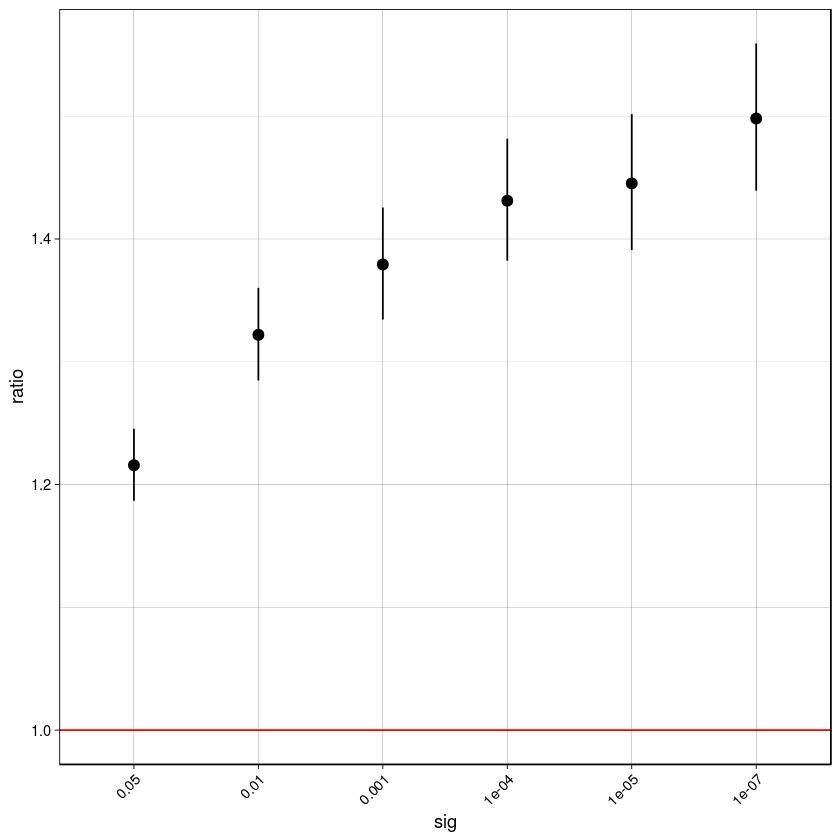

In [17]:
enrichment.by.significance.output.v8_Jonah <- 
  enrichment_by_significance(
    v8_scores ,
    rare.variants)
notify_self(paste0("*",tissue ," [S03]: ",  "Enrichment by significance for var level AE data","*"), show_plot = 'T')

## Blue is phaser, red is Jonah's V8 AE

In [166]:
full_enrichment_plt <- list(`Phaser` = enrichment.by.significance.output.v8_phaser, `variant_level_AE` = enrichment.by.significance.output.v8_Jonah) %>%
  bind_rows(.id = "color_code")
full_enrichment_plt$sig <- factor(full_enrichment_plt$sig)

In [167]:
full_enrichment_plt

color_code,ratio,lower.q,upper.q,n.outliers.w.var,n.outliers,n.non.outliers.w.var,n.non.outliers,sig
<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<fct>
Phaser,1.306259,1.266565,1.347197,865,1099,230169,381995,0.05
Phaser,1.349984,1.304422,1.397137,611,751,230423,382343,0.01
Phaser,1.387908,1.335761,1.442092,430,514,230604,382580,0.001
Phaser,1.415547,1.359680,1.473709,349,409,230685,382685,1e-04
Phaser,1.439624,1.380428,1.501358,289,333,230745,382761,1e-05
Phaser,1.427209,1.358682,1.499192,222,258,230812,382836,1e-07
variant_level_AE,1.215748,1.186803,1.245398,1977,2811,395674,683967,0.05
variant_level_AE,1.321966,1.284797,1.360210,1116,1459,396535,685319,0.01
variant_level_AE,1.379251,1.334401,1.425609,712,892,396939,685886,0.001


In [3]:



plt.tbl <- full_enrichment_plt
plt.tbl <- plt.tbl %>%
  arrange(desc(sig)) %>%
  filter(n.outliers.w.var > 1) 

print(
  ggplot(plt.tbl, aes(sig, ratio, color_code)) + 
    theme_linedraw() +
    geom_pointrange(aes(ymin = lower.q, ymax = upper.q, color=plt.tbl$color_code),alpha = 0.70)  +
    
    geom_hline(yintercept = 1, color = "red") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1), title=element_text(color="black", size=9.5, face="bold"), 
    legend.position = "bottom", legend.title = element_text(color="black", size=9, face="bold")) + 
    scale_x_discrete(limits = rev(levels(plt.tbl$sig)))  + 
    labs(title="Phaser vs variant level AE data enrichment by significance", color = "Data type") 
)
notify_self(paste0("*",tissue ," [S03]: ",  "Enrichment by significance for phaser vs var level AE","*"), show_plot = 'T')
ggsave(paste0("../plots/",tissue,"_annotation_enrichment.png"))


ERROR: Error in eval(expr, envir, enclos): object 'full_enrichment_plt' not found


In [169]:
full_annotation_enrichment_plt <- list(`Phaser` = enrichment.by.annotation.output.v8_phaser, `variant_level_AE` = enrichment.by.annotation.output.v8_Jonah) %>%
  bind_rows(.id = "color_code")
full_annotation_enrichment_plt$anno <- factor(full_annotation_enrichment_plt$anno)

In [170]:
full_annotation_enrichment_plt$anno <- as.character(full_annotation_enrichment_plt$anno)

In [171]:
full_annotation_enrichment_plt

color_code,ratio,lower.q,upper.q,n.outliers.w.var,n.outliers,n.non.outliers.w.var,n.non.outliers,anno
<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>
Phaser,1.2108570,1.0382829,1.412115,142,1099,40762,381995,downstream
Phaser,1.0655243,1.0062280,1.128315,568,1099,185287,381995,intron
Phaser,1.2139246,1.0389432,1.418377,139,1099,39800,381995,upstream
Phaser,3.1623560,2.6578716,3.762595,115,1099,12640,381995,missense
Phaser,2.4849628,1.9574033,3.154710,64,1099,8952,381995,synonymous
Phaser,2.4732077,2.0755130,2.947106,113,1099,15881,381995,3_prime_UTR
Phaser,12.8085029,10.2179752,16.055798,73,1099,1981,381995,splice
Phaser,0.9566999,0.6122411,1.494958,19,1099,6903,381995,non_coding
Phaser,2.1522239,0.8067488,5.741649,4,1099,646,381995,non_coding_exon


In [172]:
#sort new dataframe based on y value
#mtcars[order(mpg, cyl),]
full_annotation_enrichment_plt <- full_annotation_enrichment_plt[order(full_annotation_enrichment_plt$ratio),]

In [1]:
  plt.tbl <- full_annotation_enrichment_plt
    plt.tbl <- plt.tbl %>%
      arrange(desc(ratio)) %>%
      filter(n.outliers.w.var > 1) %>%
      group_by(anno) %>%
      filter(n() > 1)

    print(
      ggplot(plt.tbl, aes(reorder(anno, -ratio), ratio)) +
        theme_linedraw() +
        geom_pointrange(aes(ymin = lower.q, ymax = upper.q, color=plt.tbl$color_code),alpha = 0.70)  +
        geom_hline(yintercept = 1, color = "red") +
        scale_y_continuous(trans='log2') +
        theme(axis.text.x = element_text(angle = 45, hjust = 1), title=element_text(color="black", size=9.5, face="bold"),
        legend.position = "bottom", legend.title = element_text(color="black", size=9, face="bold")) + 
        labs(title="Phaser vs variant level AE data enrichment by annotation", color = "Data type" ) + xlab("variant annotation") 

    )
ggsave(paste0("../plots/",tissue,"_annotation_enrichment.png"))

notify_self(paste0("*",tissue ," [S03]: ",  "Enrichment by annotation for phaser vs var level AE","*"), show_plot = 'T')


ERROR: Error in eval(expr, envir, enclos): object 'full_annotation_enrichment_plt' not found
